# Librairies and external tables

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import lognorm

import os

In [16]:
folder_path = r"C:\Users\Afra Muhammad\Case_study_fairglow"

file_path_water = os.path.join(folder_path, "Table_Emission_Factor_Water.csv")

file_path_heat = os.path.join(folder_path, "Table_Multinomial_Distribution_for_Heat.csv")

# Water Source

In [17]:
df_water = pd.read_csv(file_path_water, sep=';')

df_water.head()

,ID,Name,ecoinvent-v3.5 Dataset,Amount (MJ),Unit,Comment,Proportion,CO2,"GEO,,,,,"
0,w1,"tap water production, underground water with d...","tap water production, underground water with d...",NaN,kg,NaN,0.142857,0.000136,Europe without Switzerland (Europe without Swi...
1,w2,"tap water production, underground water with c...","tap water production, underground water with c...",NaN,kg,NaN,0.142857,0.000297,Europe without Switzerland (Europe without Swi...
2,w3,"tap water production, underground water withou...","tap water production, underground water withou...",NaN,kg,NaN,0.142857,0.000014,"Switzerland (CH),,,"
3,w4,"tap water production, conventional treatment","tap water production, conventional treatment",NaN,kg,NaN,0.142857,0.000218,Europe without Switzerland (Europe without Swi...
4,w5,"tap water production, microstrainer treatment","tap water production, microstrainer treatment",NaN,kg,NaN,0.142857,0.000376,"Rest-of-World (RoW),,,"


In [18]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7 non-null      object 
 1   Name                    7 non-null      object 
 2   ecoinvent-v3.5 Dataset  7 non-null      object 
 3   Amount (MJ)             0 non-null      float64
 4   Unit                    7 non-null      object 
 5   Comment                 0 non-null      float64
 6   Proportion              7 non-null      float64
 7   CO2                     7 non-null      float64
 8   GEO,,,,,                7 non-null      object 
dtypes: float64(4), object(5)
memory usage: 636.0+ bytes


In [19]:
# Function to pick a random source for water

def water_source_random():
    water_names = df_water['Name'].values
    random_water = np.random.choice(water_names) # Equivalent probability for each value
    co2_factor = df_water.loc[df_water['Name'] == random_water, 'CO2'].values[0]
    return random_water, co2_factor

In [20]:
# Test of the function
water_source_random()

('tap water production, conventional with biological treatment',
 np.float64(0.000287996))

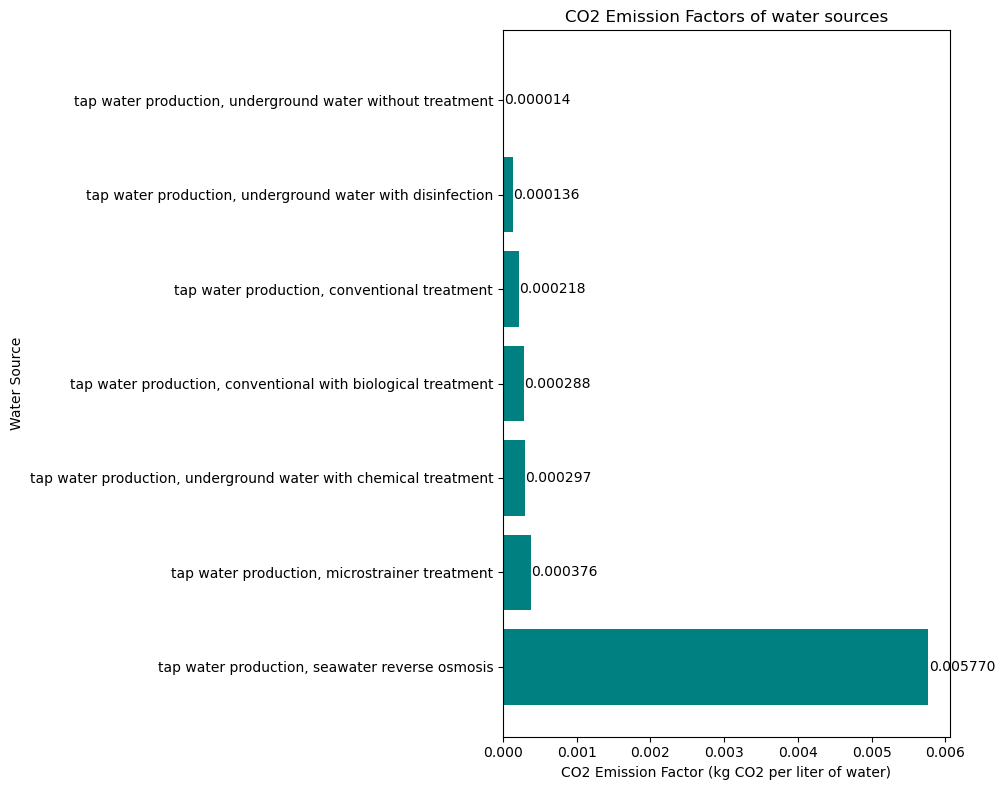

In [21]:
df_water_sorted = df_water.sort_values(by='CO2', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_water_sorted['Name'], df_water_sorted['CO2'], color='teal')
plt.xlabel('CO2 Emission Factor (kg CO2 per liter of water)')
plt.ylabel('Water Source')
plt.title('CO2 Emission Factors of water sources')

for i, value in enumerate(df_water_sorted['CO2']):
    plt.text(value + 0.000005, i, f"{value:.6f}", va='center')

plt.tight_layout()
plt.show()

# Heat Source

In [22]:
df_heat = pd.read_csv(file_path_heat, sep=';')

df_heat.head()

,ID,Name,ecoinvent-v3.5 Dataset,Amount (MJ),Unit,Comment,Proportion,CO2,"GEO,,,,,,"
0,h1,"Heat, central or small-scale, share of gas hea...","Heat production, natural gas, at boiler conden...",0.4990,MJ,Share of gas heating,0.385537,0.074034,Europe without Switzerland (Europe without Swi...
1,h2,"Heat, central or small-scale, share of oil hea...","Heat production, light fuel oil, at boiler 10k...",0.2720,MJ,Share of oil heating,0.210152,0.104351,Europe without Switzerland (Europe without Swi...
2,h3,"Heat, district or industrial, share of distric...",Heat from municipal waste incineration to gene...,0.1580,MJ,Share of district heating,0.122074,0.000260,"Switzerland (CH),,,"
3,h4,"Heat, borehole heat pump {CH}","Heat production, borehole heat exchanger, brin...",0.0598,MJ,Share from heat pumps,0.046203,0.029317,Europe without Switzerland (Europe without Swi...
4,h5,"Heat, central or small-scale, share from wood ...","Heat production, softwood chips from forest, a...",0.0095,MJ,Share from wood heating,0.007340,0.006018,"Switzerland (CH),,"


In [23]:
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7 non-null      object 
 1   Name                    7 non-null      object 
 2   ecoinvent-v3.5 Dataset  6 non-null      object 
 3   Amount (MJ)             7 non-null      float64
 4   Unit                    7 non-null      object 
 5   Comment                 7 non-null      object 
 6   Proportion              7 non-null      float64
 7   CO2                     7 non-null      float64
 8   GEO,,,,,,               7 non-null      object 
dtypes: float64(3), object(6)
memory usage: 636.0+ bytes


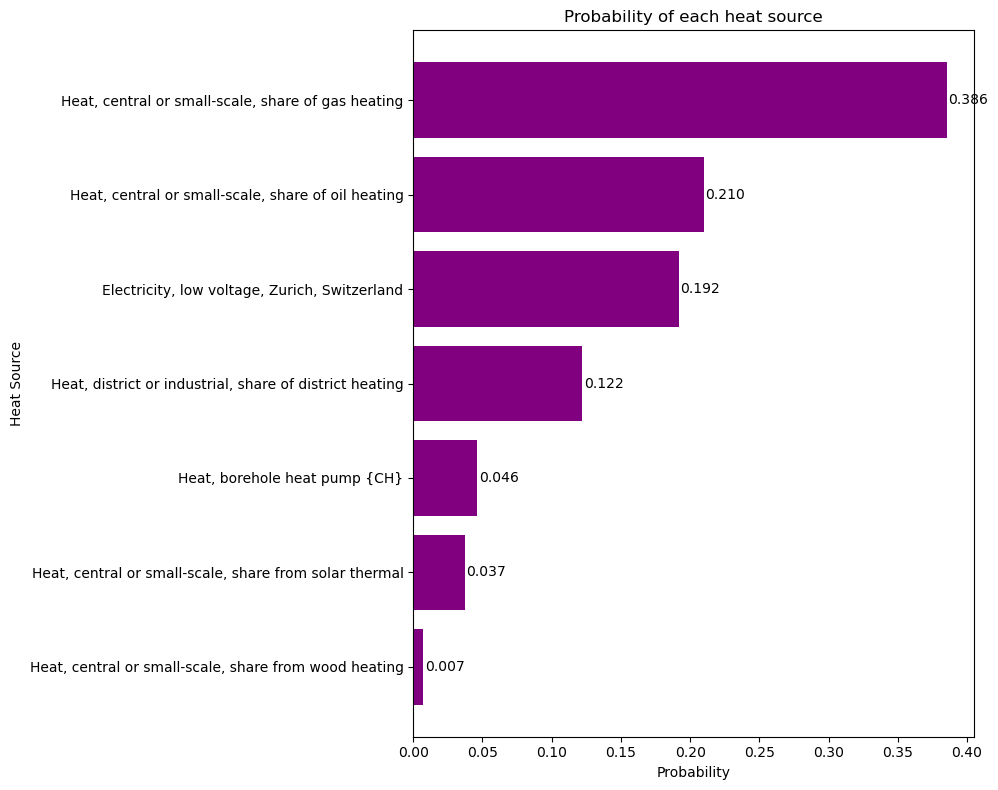

In [24]:
# Checking the distribution for each heat source 

df_heat_sorted = df_heat.sort_values(by='Proportion', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_heat_sorted['Name'], df_heat_sorted['Proportion'], color='purple')
plt.xlabel('Probability')
plt.ylabel('Heat Source')
plt.title('Probability of each heat source')

for index, value in enumerate(df_heat_sorted['Proportion']):
    plt.text(value + 0.001, index, f"{value:.3f}", va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

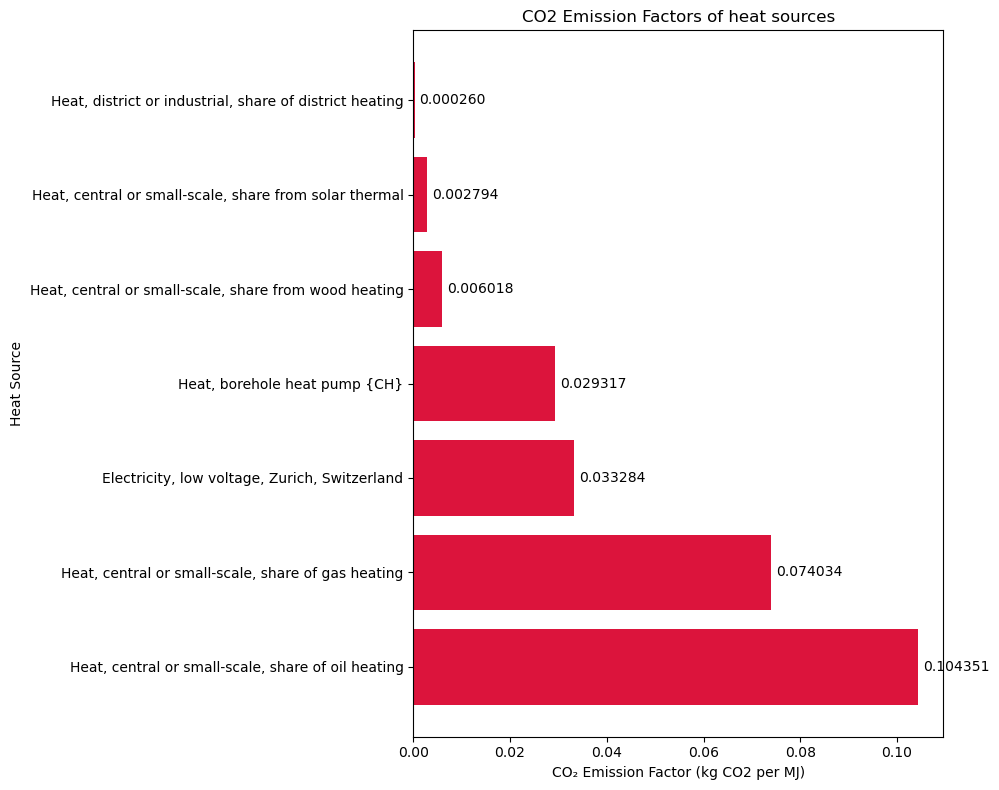

In [25]:
df_heat_sorted_co2 = df_heat.sort_values(by='CO2', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_heat_sorted_co2['Name'], df_heat_sorted_co2['CO2'], color='crimson')
plt.xlabel('CO₂ Emission Factor (kg CO2 per MJ)')
plt.ylabel('Heat Source')
plt.title('CO2 Emission Factors of heat sources')

for i, value in enumerate(df_heat_sorted_co2['CO2']):
    plt.text(value + 0.001, i, f"{value:.6f}", va='center')

plt.tight_layout()
plt.show()

In [26]:
# Function to pick a random source for heat

def heat_source_random():
    heat_names = df_heat['Name'].values
    heat_probs = df_heat['Proportion'].values
    random_heat = np.random.choice(heat_names, p=heat_probs)
    co2_factor = df_heat.loc[df_heat['Name'] == random_heat, 'CO2'].values[0]
    return random_heat, co2_factor

In [27]:
# Test of the function
heat_source_random()

('Electricity, low voltage, Zurich, Switzerland', np.float64(0.033284045))

# Log normal distribution for shower lenght

Using this article  
<https://medium.com/data-bistrot/log-normal-distribution-with-python-7b8e384e939e>  
and the documentation from NumPy  
<https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html>,  

We can plot a **lognormal distribution** according to the parameters given for the distribution of a shower.

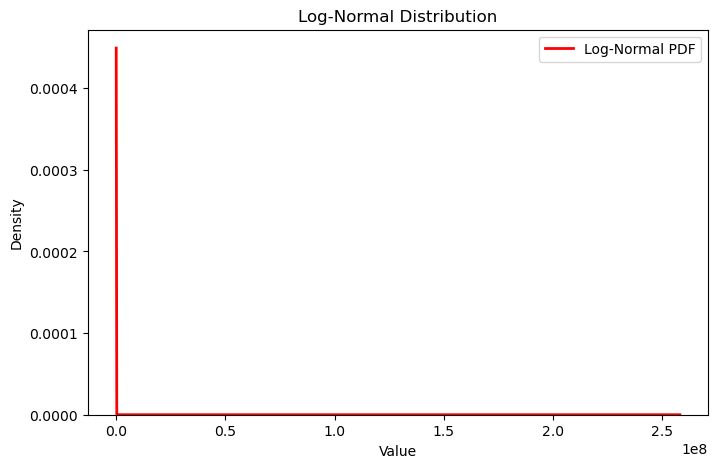

Median:  22026.465794806718
Mean:  1982759.2635375687
Mode:  2.718281828459045
Variance:  3.1852000422816612e+16
Standard Deviation:  178471287.39048365


In [28]:
mu = 10 # Mean of log(X)
sigma = 3 # Standard deviation of log(X)

# Generate log-normal data
data = np.random.lognormal(mean=mu, sigma=sigma, size=1000)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Overlay log-normal PDF
x = np.linspace(min(data), max(data), 1000)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r', linewidth=2, label="Log-Normal PDF")

plt.title("Log-Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Calculating the median, mean, mode & variance
import math
median = math.exp(mu)
mean = math.exp(mu + 0.5*(sigma**2))
mode = math.exp(mu - (sigma**2))
variance = (math.exp(sigma**2)-1)*math.exp(2*mu + (sigma**2))
std = math.sqrt(variance)

print("Median: ",median)
print("Mean: ",mean)
print("Mode: ",mode)
print("Variance: ",variance)
print("Standard Deviation: ",std)

This is not right: we obtained a mean shower time of **1,982,759 minutes**, which corresponds to approximately **1377 days**.

It could be that the parameters provided are **not** actually the mean of $\log(X)$ and the standard deviation of $\log(X)$.

Let us instead assume that:

- The mean shower time $m = 10$ minutes  
- The standard deviation of shower time $s = 3$ minutes

We then need to compute the *true* parameters $\mu$ and $\sigma$ of the corresponding **lognormal distribution**.

---

### Computing the lognormal parameters

According to  
<https://en.wikipedia.org/wiki/Log-normal_distribution#Arithmetic_moments>  
and  
<https://blogs.sas.com/content/iml/2014/06/04/simulate-lognormal-data-with-specified-mean-and-variance.html>,

given:

- arithmetic mean $m$  
- arithmetic variance $v = s^2$

the parameters are:

$$
\sigma = \sqrt{\ln\left(1 + \frac{v}{m^2}\right)}
$$

$$
\mu = \ln\left(\frac{m^2}{\sqrt{v + m^2}}\right)
$$


In [29]:
mean = 10
standard_deviation = 3
variance = standard_deviation**2

mu =  math.log((mean**2)/math.sqrt(variance + (mean**2))) # Calculated from supposed mean and variance
sigma = math.sqrt(math.log(1 + (variance / (mean**2))))  # Calculated from supposed mean and variance

# Generate log-normal data on 1000 points
data = np.random.lognormal(mean=mu, sigma=sigma, size=1000)

# Calculating the median, mean, mode & variance
median = math.exp(mu)
mean = math.exp(mu + 0.5*(sigma**2))
mode = math.exp(mu - (sigma**2))
variance = (math.exp(sigma**2)-1)*math.exp(2*mu + (sigma**2))
std = math.sqrt(variance)

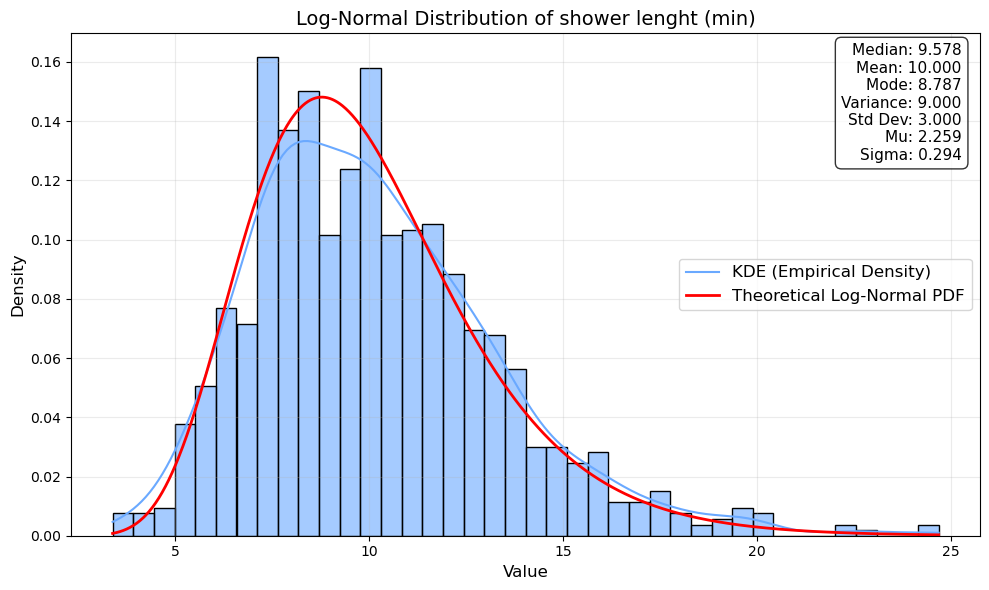

In [30]:
# Plotting the distribution for shower duration

plt.figure(figsize=(10, 6))

ax = sns.histplot(
    data, 
    bins=40,
    kde=True,
    stat="density",
    color="#6aa9ff",
    edgecolor="black",
    alpha=0.6
)

plt.gca().lines[0].set_label("KDE (Empirical Density)")

x = np.linspace(min(data), max(data), 1000)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, color="red", linewidth=2, label="Theoretical Log-Normal PDF")

stats_text = (
    f"Median: {median:.3f}\n"
    f"Mean: {mean:.3f}\n"
    f"Mode: {mode:.3f}\n"
    f"Variance: {variance:.3f}\n"
    f"Std Dev: {std:.3f}\n"
    f"Mu: {mu:.3f}\n"
    f"Sigma: {sigma:.3f}"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.8)
)

plt.title("Log-Normal Distribution of shower lenght (min)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.25)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

# Monte Carlo

In [31]:
# Fixing a seed for reproducibility
rng = np.random.default_rng(seed=1230)

In [32]:
# Constant
Flow_rate = 2.5 * 4.546 # Conversion in liter, in liter of water per minute
Heat_Energy = 0.144 # In MJ per liter of water

# Shower distribution parameters
mean = 10
standard_deviation = 3
variance = standard_deviation**2
mu =  math.log((mean**2)/math.sqrt(variance + (mean**2)))
sigma = math.sqrt(math.log(1 + (variance / (mean**2))))

In [33]:
# Function for shower length
def shower_time_random(mean_log, sig_log):
    shower_time = rng.lognormal(mean=mean_log, sigma=sig_log)
    return round(shower_time, 2)

In [34]:
# Function for heat source
def heat_source_random():
    heat_names = df_heat['Name'].values
    heat_probs = df_heat['Proportion'].values
    random_heat = rng.choice(heat_names, p=heat_probs)
    co2_factor = df_heat.loc[df_heat['Name'] == random_heat, 'CO2'].values[0]
    return random_heat, co2_factor

In [35]:
# Function to pick a random source for water
def water_source_random():
    water_names = df_water['Name'].values
    random_water = rng.choice(water_names)
    co2_factor = df_water.loc[df_water['Name'] == random_water, 'CO2'].values[0]
    return random_water, co2_factor

In [36]:
def CO2_cal(shower_duration, water_flow_rate, cte_heat_energy_water, cte_heat_source, cte_heat_energy):
    total_water = shower_duration * water_flow_rate
    total_heat_energy = total_water * cte_heat_energy
    total_CO2eq_heat = total_heat_energy * cte_heat_source
    total_CO2eq_water = total_water * cte_heat_energy_water
    total_CO2eq = total_CO2eq_heat + total_CO2eq_water
    return total_water,total_heat_energy,total_CO2eq_heat,total_CO2eq_water,total_CO2eq

In [37]:
# One simulation to check manually if the calculation function works
shower_time_simul = shower_time_random(mu,sigma)
heat_source_simul = heat_source_random()
water_source_simul = water_source_random()

print("SHOWER TIME :", shower_time_simul)
print("HEAT SOURCE :",heat_source_simul)
print("WATER SOURCE :",water_source_simul)

CO2_cal(shower_time_simul,Flow_rate,water_source_simul[1],heat_source_simul[1],Heat_Energy)

SHOWER TIME : 13.73
HEAT SOURCE : ('Heat, central or small-scale, share of oil heating', np.float64(0.104351333))
WATER SOURCE : ('tap water production, conventional with biological treatment', np.float64(0.000287996))


(156.04145,
 22.469968799999997,
 np.float64(2.34477119674841),
 np.float64(0.0449393134342),
 np.float64(2.3897105101826104))

In [38]:
# Defining a function to run n amount of simulations

def run_monte_carlo(N, mu, sigma, Flow_rate, Heat_Energy):
    results = []

    for i in range(1, N+1):

        shower_time = shower_time_random(mu, sigma)

        heat_name, heat_factor = heat_source_random()

        water_name, water_factor = water_source_random()

        total_water, total_heat_energy, total_CO2_heat, total_CO2_water, total_CO2 \
            = CO2_cal(
                shower_time,
                Flow_rate,
                water_factor, 
                heat_factor,   
                Heat_Energy
            )

        results.append({
            "Simulation": i,
            "Shower_time_min": shower_time,
            
            "Heat_Source": heat_name,
            "Heat_CO2_factor": heat_factor,

            "Water_Source": water_name,
            "Water_CO2_factor": water_factor,

            "Total_Water_L": total_water,
            "Total_Heat_Energy_kWh": total_heat_energy,
            "CO2_Heat": total_CO2_heat,
            "CO2_Water": total_CO2_water,
            "CO2_Total": total_CO2
        })

    df_results = pd.DataFrame(results)
    return df_results

In [39]:
df_sim = run_monte_carlo(
    N=1000,
    mu=mu,
    sigma=sigma,
    Flow_rate=Flow_rate,
    Heat_Energy=Heat_Energy
)

In [40]:
df_sim

,Simulation,Shower_time_min,Heat_Source,Heat_CO2_factor,Water_Source,Water_CO2_factor,Total_Water_L,Total_Heat_Energy_kWh,CO2_Heat,CO2_Water,CO2_Total
0,1,10.19,"Heat, central or small-scale, share of gas hea...",0.074034,"tap water production, microstrainer treatment",0.000376,115.80935,16.676546,1.234636,0.043558,1.278195
1,2,22.44,"Heat, central or small-scale, share of gas hea...",0.074034,"tap water production, underground water with c...",0.000297,255.03060,36.724406,2.718866,0.075853,2.794719
2,3,7.74,"Electricity, low voltage, Zurich, Switzerland",0.033284,"tap water production, underground water withou...",0.000014,87.96510,12.666974,0.421608,0.001243,0.422851
3,4,11.99,"Heat, central or small-scale, share of gas hea...",0.074034,"tap water production, conventional with biolog...",0.000288,136.26635,19.622354,1.452727,0.039244,1.491971
4,5,7.78,"Electricity, low voltage, Zurich, Switzerland",0.033284,"tap water production, underground water with c...",0.000297,88.41970,12.732437,0.423787,0.026299,0.450086
...,...,...,...,...,...,...,...,...,...,...,...
995,996,6.79,"Heat, district or industrial, share of distric...",0.000260,"tap water production, underground water with d...",0.000136,77.16835,11.112242,0.002888,0.010525,0.013413
996,997,15.24,"Electricity, low voltage, Zurich, Switzerland",0.033284,"tap water production, underground water with c...",0.000297,173.20260,24.941174,0.830143,0.051515,0.881659
997,998,9.79,"Heat, central or small-scale, share of oil hea...",0.104351,"tap water production, microstrainer treatment",0.000376,111.26335,16.021922,1.671909,0.041848,1.713757
998,999,7.84,"Heat, central or small-scale, share of oil hea...",0.104351,"tap water production, underground water with c...",0.000297,89.10160,12.830630,1.338893,0.026501,1.365395


# Checking the data from the simulations

## Checking distribution of heat sources

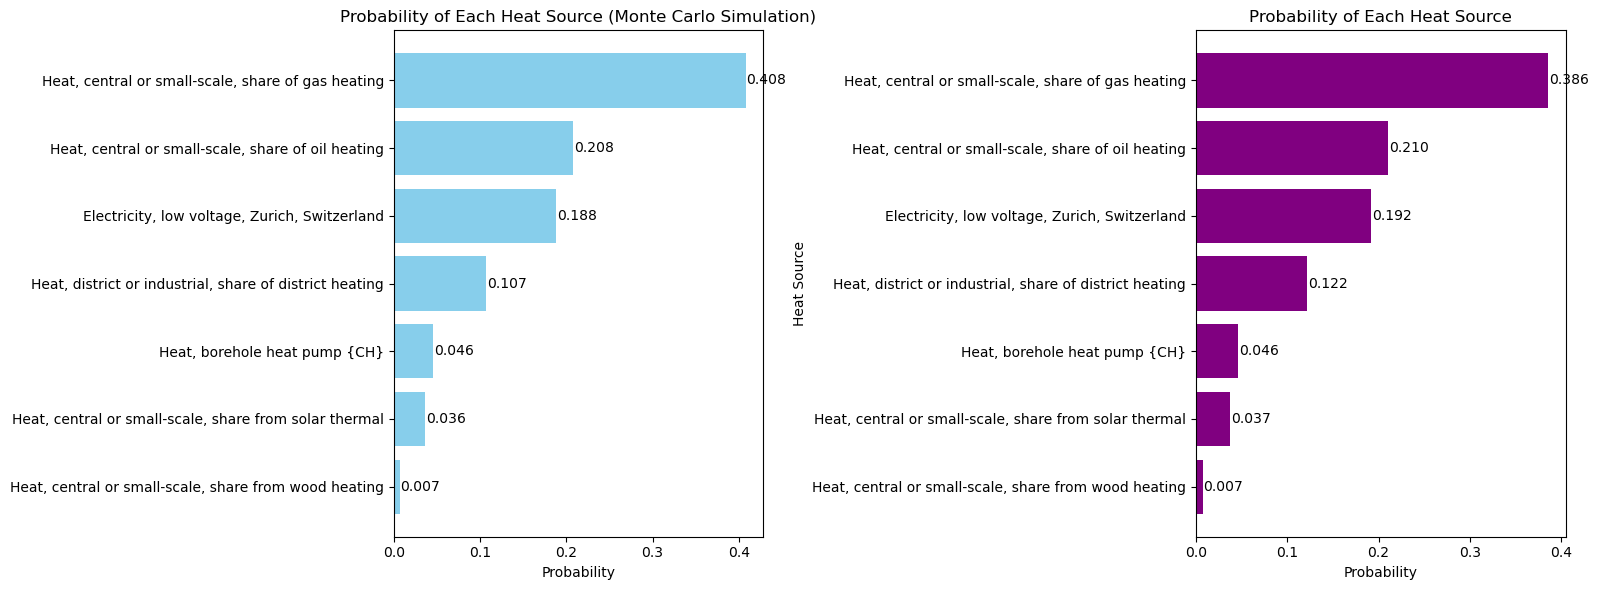

In [41]:
heat_counts = df_sim["Heat_Source"].value_counts(normalize=True).sort_values(ascending=True)
df_heat_sorted = df_heat.sort_values(by='Proportion', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot 1
axes[0].barh(heat_counts.index, heat_counts.values, color='skyblue')
axes[0].set_xlabel("Probability")
axes[0].set_title("Probability of Each Heat Source (Monte Carlo Simulation)")
for i, (source, prob) in enumerate(heat_counts.items()):
    axes[0].text(prob + 0.001, i, f"{prob:.3f}", va='center')

# Plot 2
axes[1].barh(df_heat_sorted['Name'], df_heat_sorted['Proportion'], color='purple')
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Heat Source")
axes[1].set_title("Probability of Each Heat Source")
for index, value in enumerate(df_heat_sorted['Proportion']):
    axes[1].text(value + 0.001, index, f"{value:.3f}", va='center')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Checking distribution of water sources

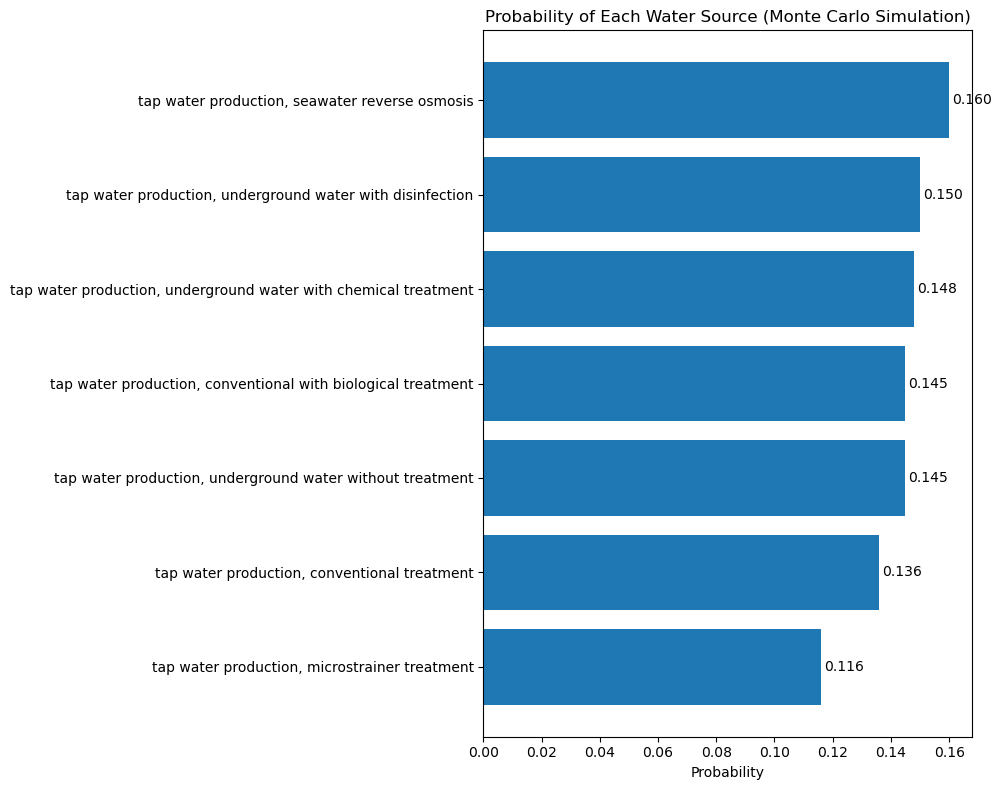

In [42]:
water_counts = df_sim["Water_Source"].value_counts(normalize=True).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(water_counts.index, water_counts.values)
plt.xlabel("Probability")
plt.title("Probability of Each Water Source (Monte Carlo Simulation)")

for i, (source, prob) in enumerate(water_counts.items()):
    plt.text(prob + 0.001, i, f"{prob:.3f}", va='center')

plt.tight_layout()
plt.show()

## Checking shower duration

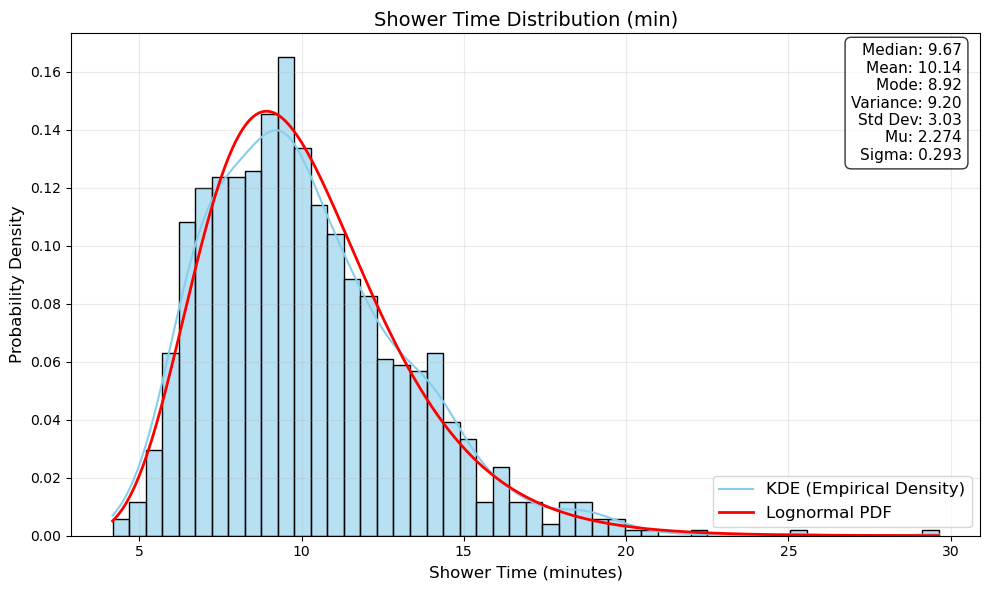

In [43]:
shower_times = df_sim["Shower_time_min"].values

log_data = np.log(shower_times)
mu = np.mean(log_data)
sigma = np.std(log_data)

shape = sigma
scale = np.exp(mu)

median = np.median(shower_times)
mean_calc = np.exp(mu + 0.5*sigma**2)
mode = np.exp(mu - sigma**2)
variance_calc = (np.exp(sigma**2)-1) * np.exp(2*mu + sigma**2)
std = math.sqrt(variance_calc)

plt.figure(figsize=(10, 6))

ax = sns.histplot(
    shower_times,
    bins=50,
    kde=True,
    stat="density",
    color="skyblue",
    edgecolor="k",
    alpha=0.6
)

plt.gca().lines[0].set_label("KDE (Empirical Density)")

x = np.linspace(min(shower_times), max(shower_times), 1000)
pdf = lognorm.pdf(x, s=shape, scale=scale)
plt.plot(x, pdf, color="red", linewidth=2, label="Lognormal PDF")

stats_text = (
    f"Median: {median:.2f}\n"
    f"Mean: {mean_calc:.2f}\n"
    f"Mode: {mode:.2f}\n"
    f"Variance: {variance_calc:.2f}\n"
    f"Std Dev: {std:.2f}\n"
    f"Mu: {mu:.3f}\n"
    f"Sigma: {sigma:.3f}"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.8)
)

plt.title("Shower Time Distribution (min)", fontsize=14)
plt.xlabel("Shower Time (minutes)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(alpha=0.25)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Checking total emissions of CO2

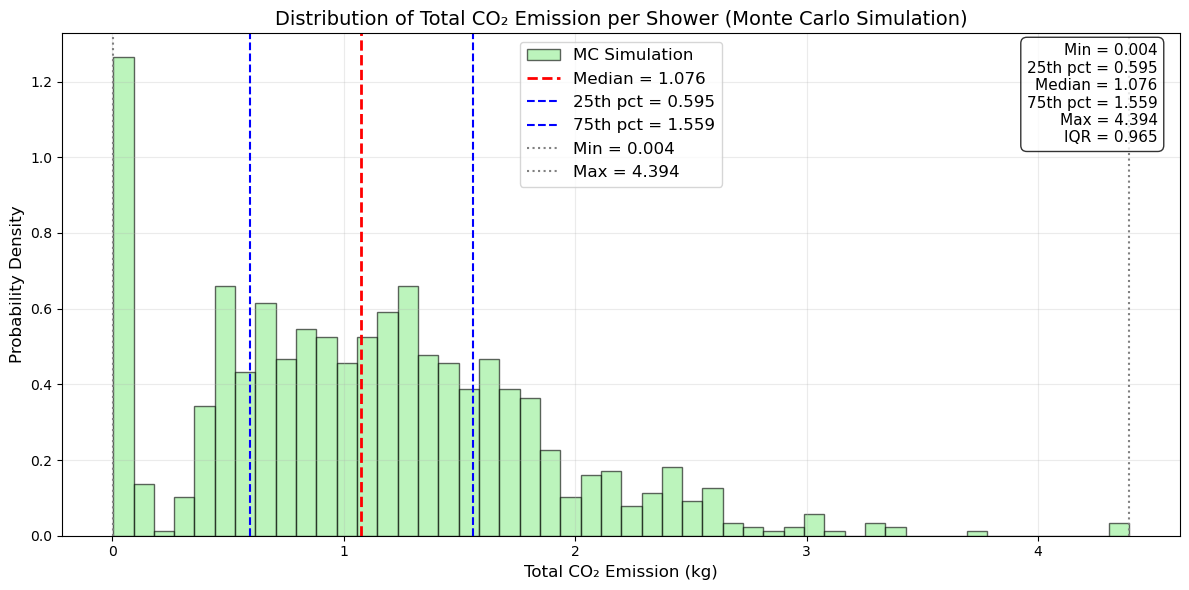

In [44]:
data = df_sim["CO2_Total"].values

median = np.median(data)
p25 = np.percentile(data, 25)
p75 = np.percentile(data, 75)
minimum = data.min()
maximum = data.max()
iqr = p75 - p25

plt.figure(figsize=(12, 6))
plt.hist(data, bins=50, density=True, color='lightgreen', edgecolor='k', alpha=0.6, label='MC Simulation')

plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f"Median = {median:.3f}")
plt.axvline(p25, color='blue', linestyle='--', linewidth=1.5, label=f"25th pct = {p25:.3f}")
plt.axvline(p75, color='blue', linestyle='--', linewidth=1.5, label=f"75th pct = {p75:.3f}")
plt.axvline(minimum, color='gray', linestyle=':', linewidth=1.5, label=f"Min = {minimum:.3f}")
plt.axvline(maximum, color='gray', linestyle=':', linewidth=1.5, label=f"Max = {maximum:.3f}")

stats_text = (
    f"Min = {minimum:.3f}\n"
    f"25th pct = {p25:.3f}\n"
    f"Median = {median:.3f}\n"
    f"75th pct = {p75:.3f}\n"
    f"Max = {maximum:.3f}\n"
    f"IQR = {iqr:.3f}"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.8)
)

plt.title("Distribution of Total CO₂ Emission per Shower (Monte Carlo Simulation)", fontsize=14)
plt.xlabel("Total CO₂ Emission (kg)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(alpha=0.25)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Checking emissions of CO2 due to WATER

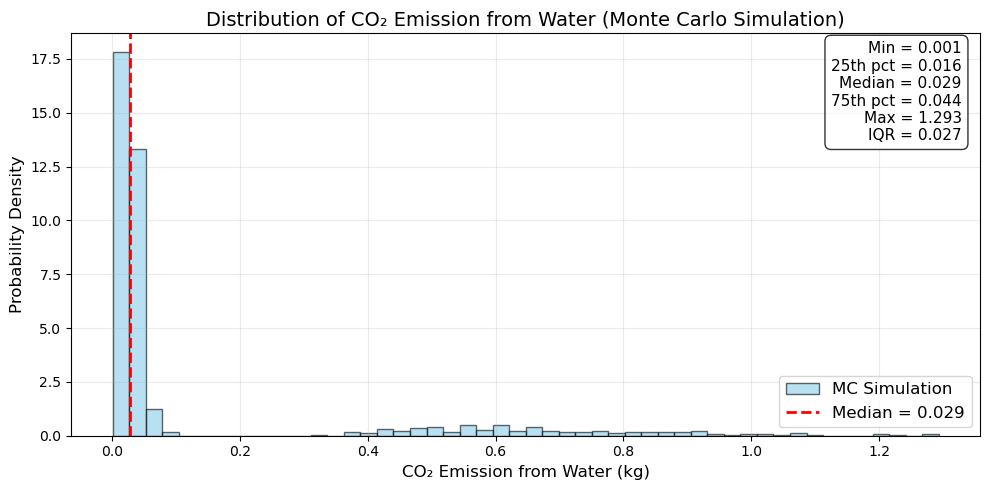

In [45]:
data = df_sim["CO2_Water"].values

median = np.median(data)
p25 = np.percentile(data, 25)
p75 = np.percentile(data, 75)
minimum = data.min()
maximum = data.max()
iqr = p75 - p25

plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, density=True, color='skyblue', edgecolor='k', alpha=0.6, label='MC Simulation')

plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f"Median = {median:.3f}")
# plt.axvline(p25, color='blue', linestyle='--', linewidth=1.5, label=f"25th pct = {p25:.3f}")
# plt.axvline(p75, color='blue', linestyle='--', linewidth=1.5, label=f"75th pct = {p75:.3f}")
# plt.axvline(minimum, color='gray', linestyle=':', linewidth=1.5, label=f"Min = {minimum:.3f}")
# plt.axvline(maximum, color='gray', linestyle=':', linewidth=1.5, label=f"Max = {maximum:.3f}")

stats_text = (
    f"Min = {minimum:.3f}\n"
    f"25th pct = {p25:.3f}\n"
    f"Median = {median:.3f}\n"
    f"75th pct = {p75:.3f}\n"
    f"Max = {maximum:.3f}\n"
    f"IQR = {iqr:.3f}"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.8)
)

plt.title("Distribution of CO₂ Emission from Water (Monte Carlo Simulation)", fontsize=14)
plt.xlabel("CO₂ Emission from Water (kg)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(alpha=0.25)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

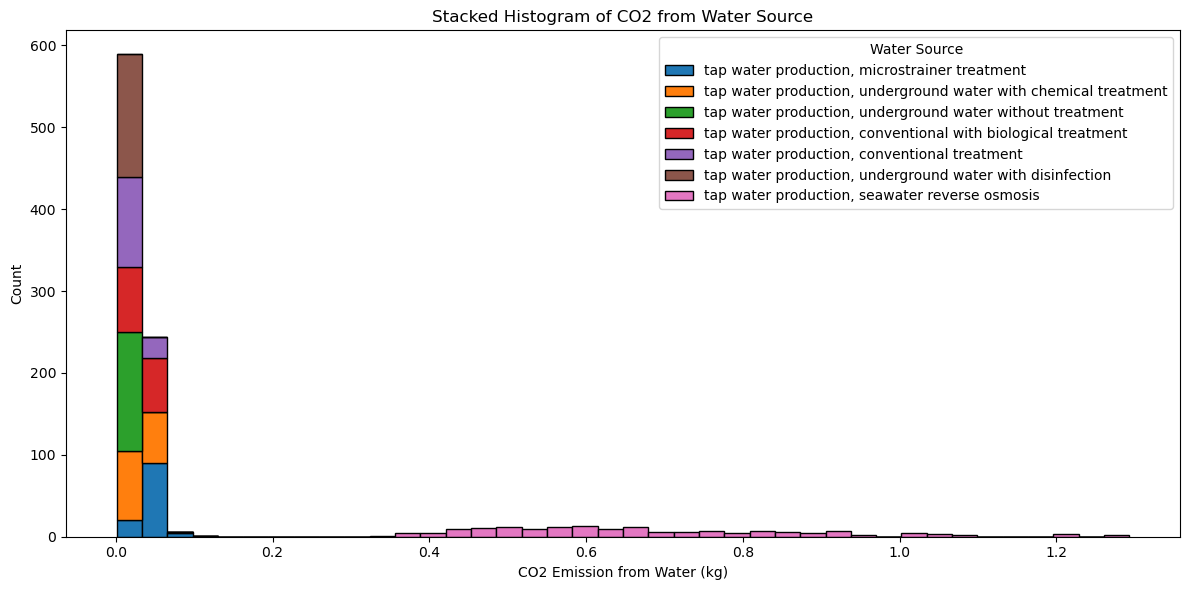

In [46]:
plt.figure(figsize=(12, 6))

water_sources = df_sim["Water_Source"].unique()

data_list = [df_sim[df_sim["Water_Source"] == s]["CO2_Water"] for s in water_sources]
labels = water_sources
colors = plt.cm.tab10(range(len(water_sources)))  # distinct colors

plt.hist(
    data_list,
    bins=40,
    stacked=True,
    label=labels,
    color=colors,
    edgecolor="black"
)

plt.xlabel("CO2 Emission from Water (kg)")
plt.ylabel("Count")
plt.title("Stacked Histogram of CO2 from Water Source")
plt.legend(title="Water Source")
plt.tight_layout()
plt.show()

## Checking emissions of CO2 due to HEAT

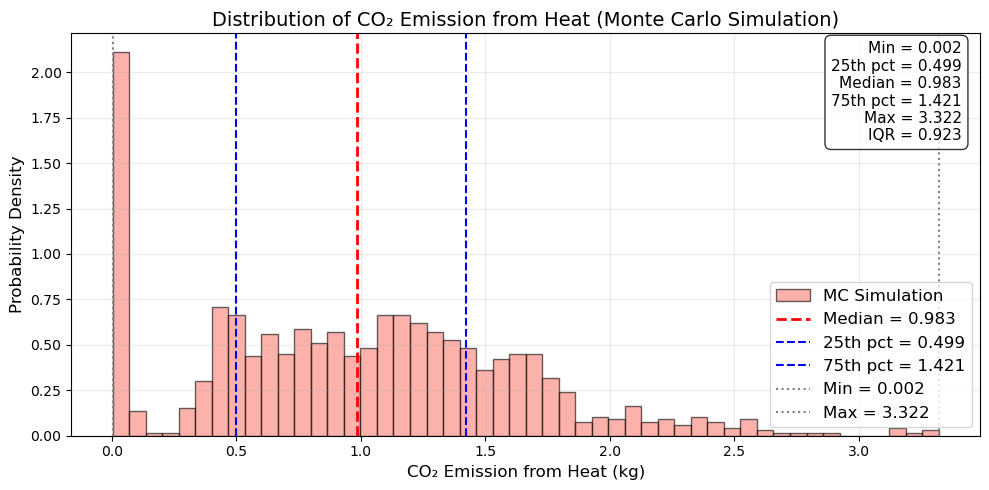

In [47]:
data = df_sim["CO2_Heat"].values

median = np.median(data)
p25 = np.percentile(data, 25)
p75 = np.percentile(data, 75)
minimum = data.min()
maximum = data.max()
iqr = p75 - p25

plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, density=True, color='salmon', edgecolor='k', alpha=0.6, label='MC Simulation')

plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f"Median = {median:.3f}")
plt.axvline(p25, color='blue', linestyle='--', linewidth=1.5, label=f"25th pct = {p25:.3f}")
plt.axvline(p75, color='blue', linestyle='--', linewidth=1.5, label=f"75th pct = {p75:.3f}")
plt.axvline(minimum, color='gray', linestyle=':', linewidth=1.5, label=f"Min = {minimum:.3f}")
plt.axvline(maximum, color='gray', linestyle=':', linewidth=1.5, label=f"Max = {maximum:.3f}")

stats_text = (
    f"Min = {minimum:.3f}\n"
    f"25th pct = {p25:.3f}\n"
    f"Median = {median:.3f}\n"
    f"75th pct = {p75:.3f}\n"
    f"Max = {maximum:.3f}\n"
    f"IQR = {iqr:.3f}"
)

plt.text(
    0.98, 0.98, stats_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.8)
)

plt.title("Distribution of CO₂ Emission from Heat (Monte Carlo Simulation)", fontsize=14)
plt.xlabel("CO₂ Emission from Heat (kg)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(alpha=0.25)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

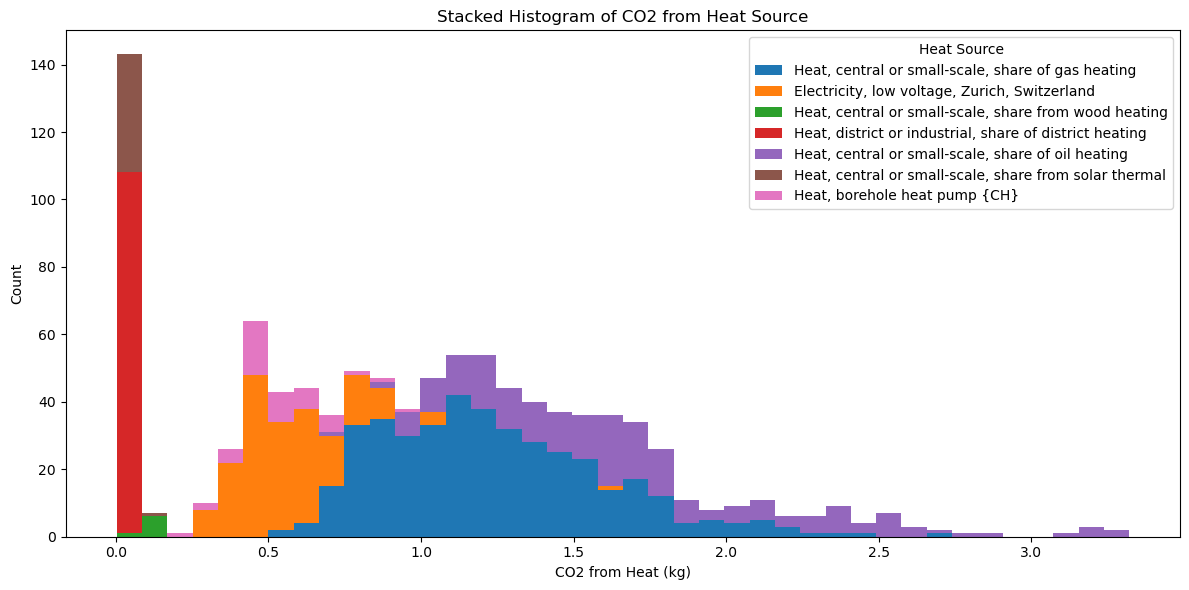

In [48]:
plt.figure(figsize=(12, 6))

heat_sources = df_sim["Heat_Source"].unique()
data_list = [df_sim[df_sim["Heat_Source"] == s]["CO2_Heat"] for s in heat_sources]
labels = heat_sources
colors = plt.cm.tab10(range(len(heat_sources)))

plt.hist(data_list, bins=40, stacked=True, label=labels, color=colors)

plt.xlabel("CO2 from Heat (kg)")
plt.ylabel("Count")
plt.title("Stacked Histogram of CO2 from Heat Source")
plt.legend(title="Heat Source")
plt.tight_layout()
plt.show()